In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
class Voltage:
    amplitude: float

    def __init__(self, amplitude = 2, frequency = 1, reprtition = 1, n_points= 100, duty_cycle=0.25, set_noise = False, mean = 0, sigma = 0):
        self.amplitude = amplitude
        self.frequency = frequency
        self.reprtition = reprtition
        self.n_points = n_points
        self.duty_cycle = duty_cycle
        self.period = 1 / frequency
        self.time_array = np.linspace(0, self.reprtition * self.period, self.reprtition * self.n_points)
        self.set_noise = set_noise
        if set_noise == True:
            self.noise = np.random.normal(mean,sigma, self.reprtition * self.n_points)


    def sine(self) -> list:
        scale = 2 * np.pi * self.frequency
        voltage = self.amplitude * np.sin(self.time_array * scale)
        self.voltage = np.array(voltage)
        if self.set_noise == True:
            self.voltage += self.noise
        return [self.time_array, self.voltage]
    
    def triangle(self):
        quater_period = self.period / 4
        t = self.time_array
        voltage = []
        for j in range(self.reprtition):
            for i in t[j * self.n_points: (j+1) * self.n_points]:
                if i <= (t[j * self.n_points] + quater_period):
                    voltage.append(self.amplitude / quater_period * (i - t[j * self.n_points]))
                elif (i > (t[j * self.n_points] + quater_period)) and (i < (t[j * self.n_points] + 3 * quater_period)):
                    voltage.append(- self.amplitude / quater_period * (i - t[j * self.n_points] - 3 * quater_period) - self.amplitude)
                elif i > (t[j * self.n_points] + 3 * quater_period):
                    voltage.append(self.amplitude / quater_period * (i - t[j * self.n_points]) - 4 * self.amplitude)
        self.voltage = np.array(voltage)
        if self.set_noise == True:
            self.voltage += self.noise
        return [self.time_array, self.voltage]
    
    def bipolar_rectangle(self):
        half_period = self.period / 2
        t = self.time_array
        voltage = []
        for j in range(self.reprtition):
            for i in t[j * self.n_points: (j+1) * self.n_points]:
                if (i <= (t[j * self.n_points] + half_period /2)) or ((i > (t[j * self.n_points] + half_period)) and i < (t[j * self.n_points] + 3/2 *half_period)):
                    voltage.append(0)
                elif (i > (t[j * self.n_points] + half_period /2)) and i < (t[j * self.n_points] + half_period):
                    voltage.append(self.amplitude)
                elif (i > (t[j * self.n_points] + 3/2 *half_period )):
                    voltage.append(- self.amplitude)
        voltage[-1] = 0
        self.voltage = np.array(voltage)
        if self.set_noise == True:
            self.voltage = self.voltage + self.noise
        return [self.time_array, self.voltage]



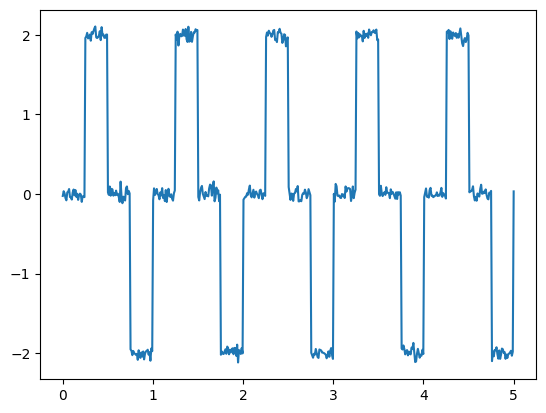

In [82]:
t, V = Voltage(reprtition=5, set_noise=True, sigma= 0.05, duty_cycle=0.01).bipolar_rectangle()
plt.plot(t, V)

In [83]:
def sum(a: float, b: float) -> int:
    return a + b

sum(1, 5.5)

6.5